# 1 参数更新
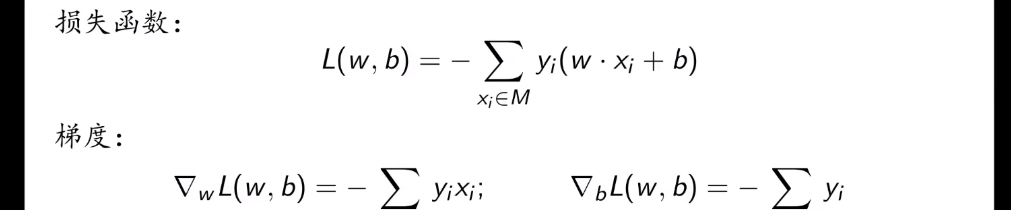

In [12]:
# 导入包
import torch
from d2l import torch as d2l
import torch.nn as nn

num_inputs, num_outputs, num_hiddens = 784, 10, 256
# nn.Parameter: 这是 PyTorch 中的一个类，用于定义可训练的参数。
W1 = nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)*0.01) 
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True)*0.01) 
W2 = nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True)*0.01) 
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True)*0.01) 
params = [W1,b1,W2,b2]

In [6]:
# 定义激活函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(a,X)
# 定义损失函数  之前写过就不写了 总体就是在net加一个softmax层，然后在计算交叉熵损失
def loss():
    return nn.CrossEntropyLoss(reduction="none")
# 定义模型
# 模型是一层输入二维的w1： 1* 28*28， 然后一层隐藏层二维的w2, ，比如是 (28*28) *256， 还含有一层relu的激活层，  输出层是10  
# b1是hidden的神经元个数  b2是最后输出层的神经元个数
def net(X):
    X = X.reshape((-1,num_inputs))
    H = relu(X@W1+b1)
    return (H@W2+b2)



In [8]:
batch_size =  256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)


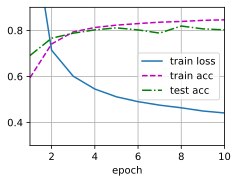

In [13]:
# 训练 训练使用之前的训练函数
epchs, lr = 10,0.05
updater = torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss(),epchs,updater)

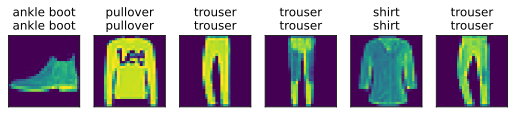

In [14]:
# 评估模型
d2l.predict_ch3(net, test_iter)